# PREDICT THE WINE QUALITY

In [1]:
#IMPORT THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import sklearn 
from sklearn import neighbors
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('winedataset.csv') # CREATE A DATAFRAME FROM THE GIVEN CSV


In [3]:
df.head() # LETS SEE THE FIRST 5 ROWS OF DATA

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.shape # Lets check the shape of data

(178, 14)

In [5]:
df.info()  # none of the feature variable is categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                   178 non-null int64
Alcohol                 178 non-null float64
Malic acid              178 non-null float64
Ash                     178 non-null float64
Alcalinity of ash       178 non-null float64
Magnesium               178 non-null int64
Total phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color intensity         178 non-null float64
Hue                     178 non-null float64
diluted wines           178 non-null float64
Proline                 178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [6]:
df['Class'].value_counts() # data is fairly balanced

2    71
1    59
3    48
Name: Class, dtype: int64

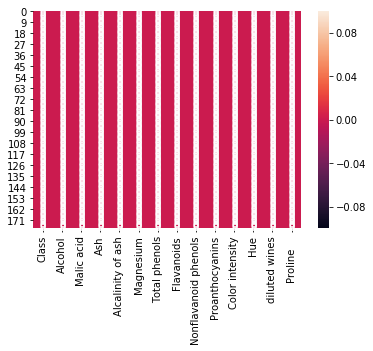

In [7]:
# Lets check the missing values
sns.heatmap(df.isnull(),annot=True)
plt.show()

In [8]:
#Lets confirm about the missing value again
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
diluted wines           0
Proline                 0
dtype: int64

In [9]:
# Lets check the descriptive statistics
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
# Lets check the correlation between variables
df.corr()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
Class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [11]:
# lET US EXPLORE THE FEW PARAMTERS WHICH HAVE HIGH CORRELATION WITH TARGET

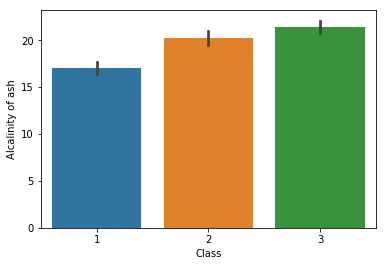

In [12]:
sns.barplot(x='Class', y='Alcalinity of ash', data=df)

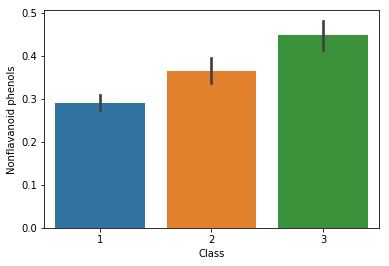

In [13]:
sns.barplot(x='Class', y='Nonflavanoid phenols', data=df)

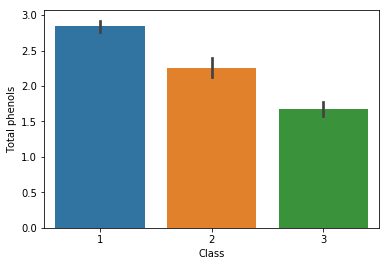

In [14]:
sns.barplot(x='Class', y='Total phenols', data=df)

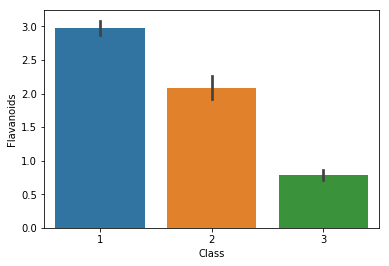

In [15]:
sns.barplot(x='Class', y='Flavanoids', data=df)

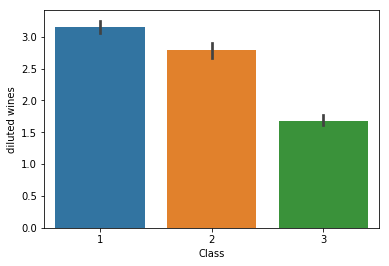

In [16]:
sns.barplot(x='Class', y='diluted wines', data=df)

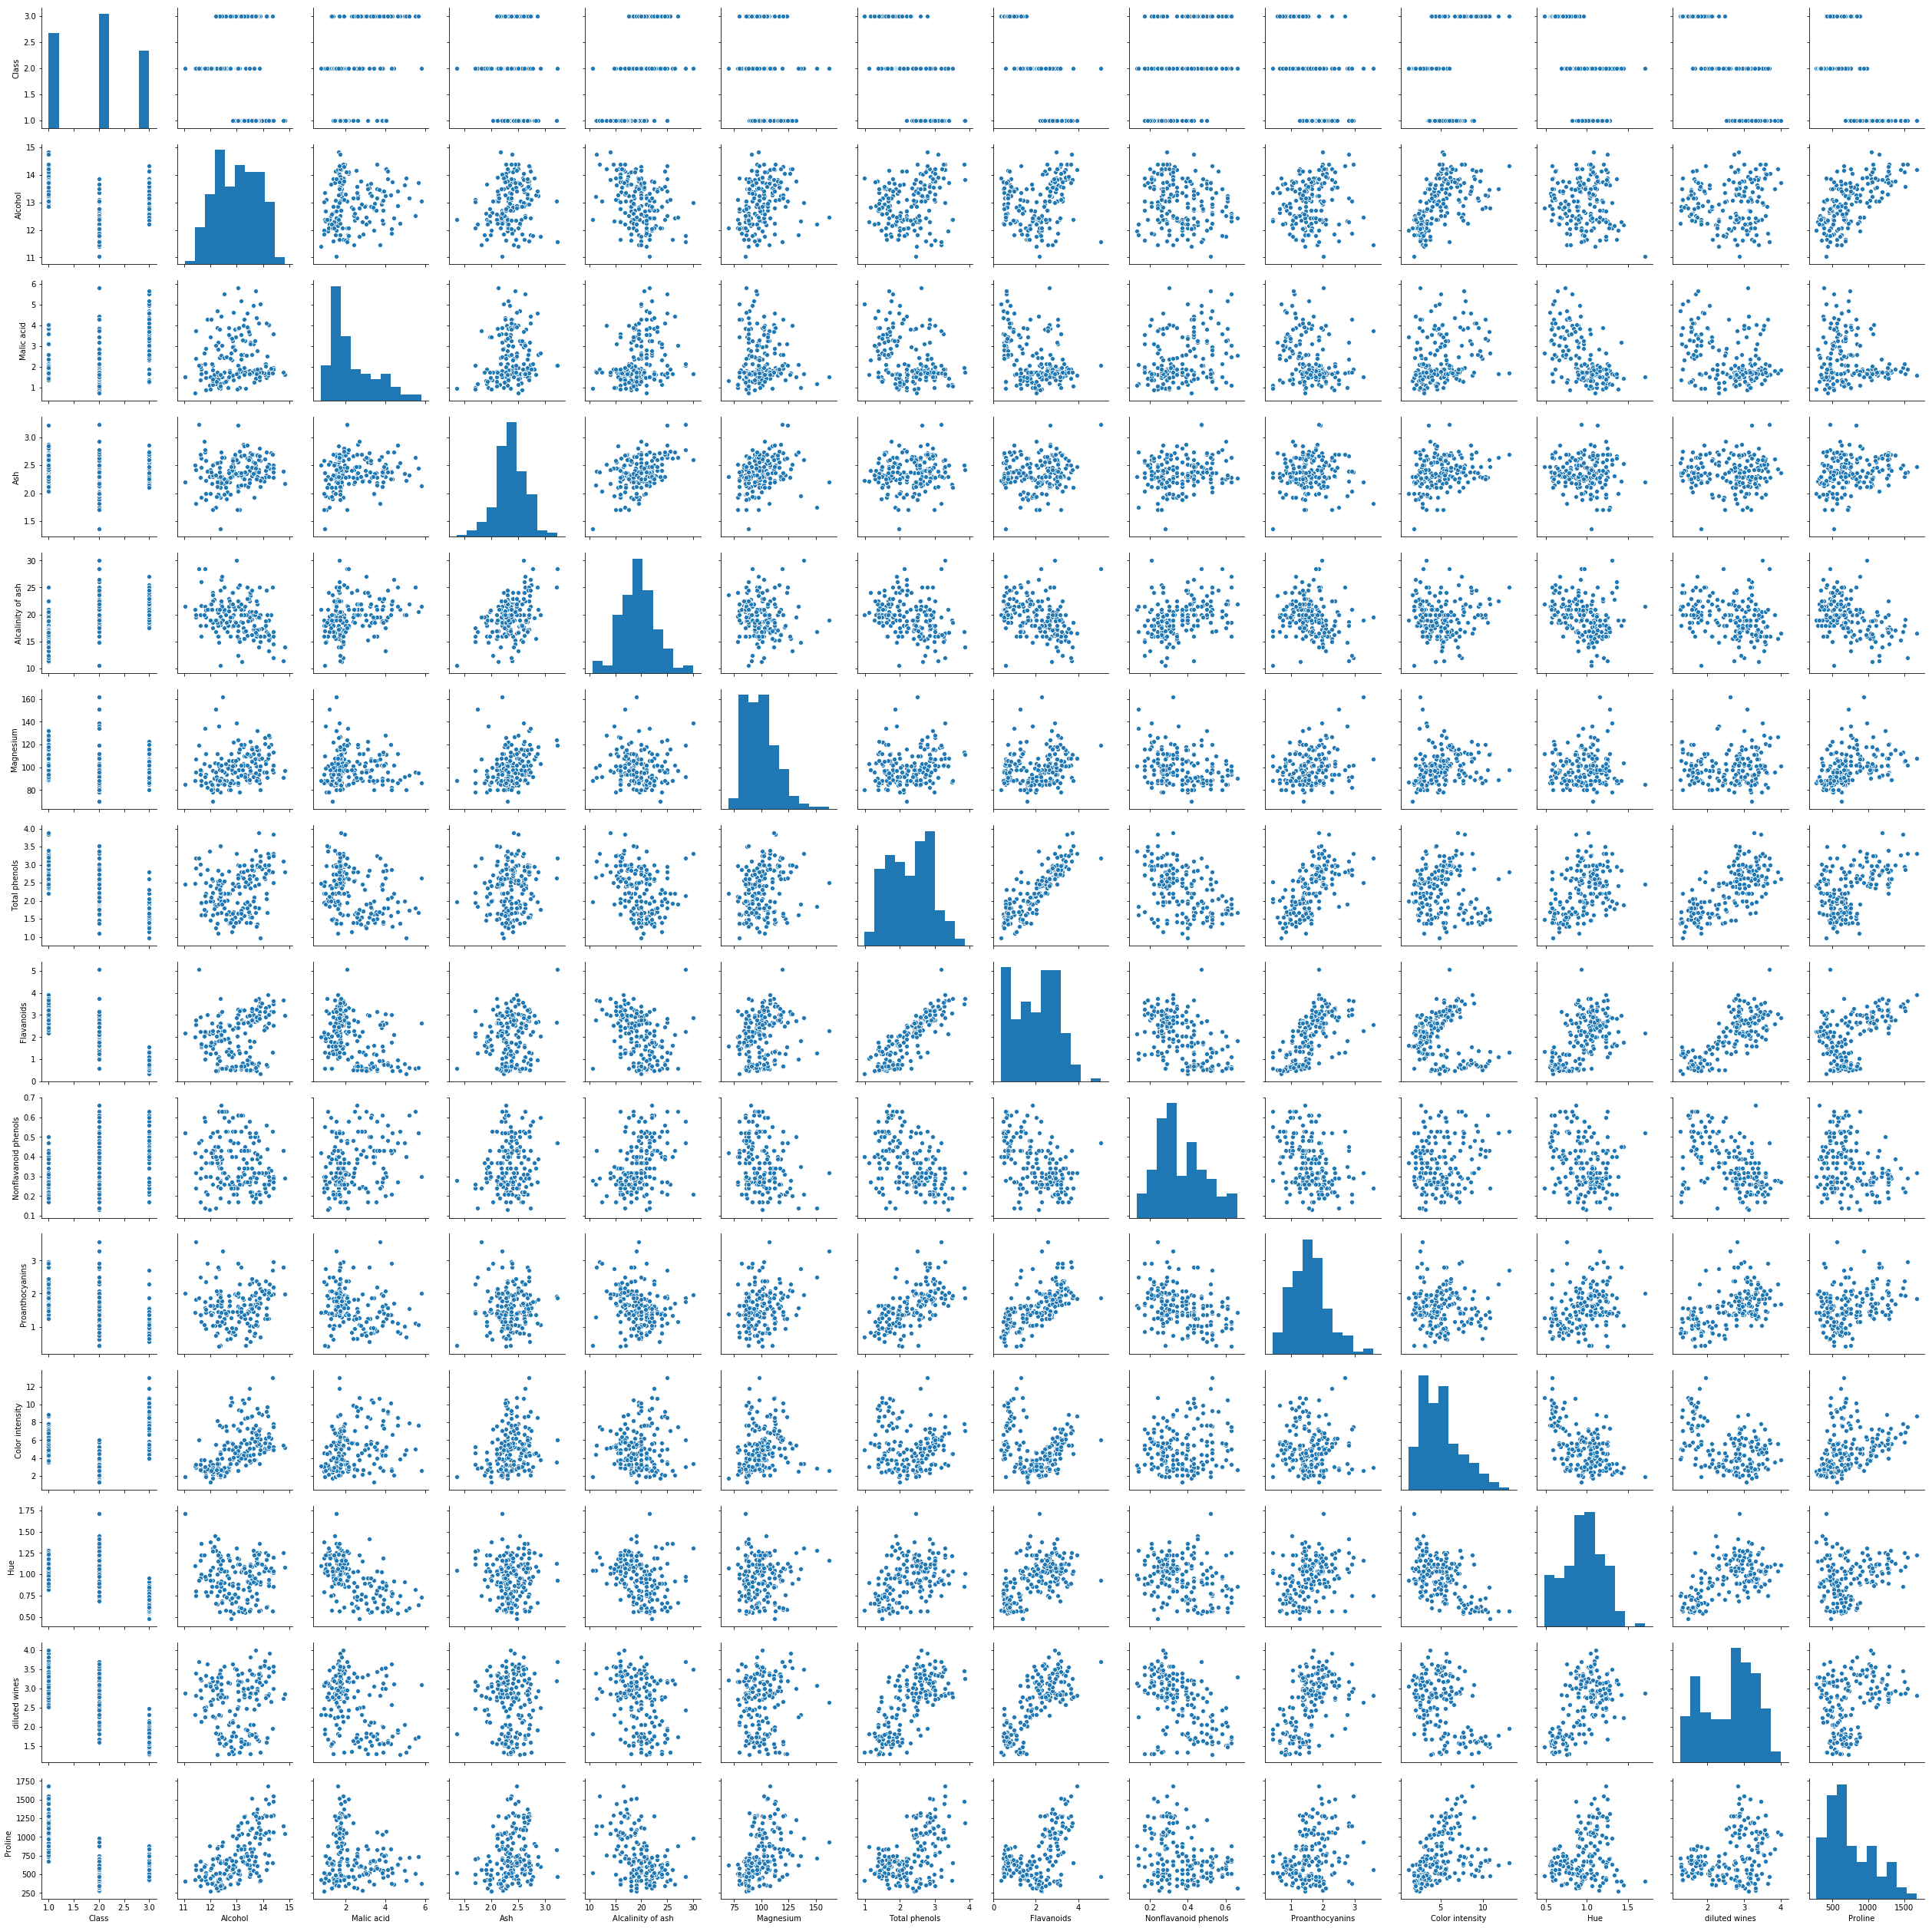

In [17]:
sns.pairplot(df)

In [18]:
df.skew() # lets Check the skewness

Class                   0.107431
Alcohol                -0.051482
Malic acid              1.039651
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               1.098191
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.868585
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.767822
dtype: float64

In [19]:
# Let us remove the Skewness
for col in df.columns:                                      
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [20]:
df.skew()  # check the skewness again

Class                   0.107431
Alcohol                -0.051482
Malic acid              0.529222
Ash                    -0.176699
Alcalinity of ash       0.213047
Magnesium               0.605723
Total phenols           0.086639
Flavanoids              0.025344
Nonflavanoid phenols    0.450151
Proanthocyanins         0.517137
Color intensity         0.097222
Hue                     0.021091
diluted wines          -0.307285
Proline                 0.087930
dtype: float64

In [21]:
# Lets remove the outliers
from scipy.stats import zscore
z_score =abs(zscore(df))
dfnew = df.loc[(z_score<3).all(axis=1)]
print('The shape of original dataframe was =', df.shape)
print('The shape of dataframe after removing outliers is =', dfnew.shape)

The shape of original dataframe was = (178, 14)
The shape of dataframe after removing outliers is = (170, 14)


In [22]:
# Let us seperate the features and Target
x1=dfnew.drop(['Class'],axis=1)    
y=dfnew['Class']

In [23]:
x1.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,14.23,0.996949,2.43,15.6,4.852030,2.80,3.06,0.28,2.29,1.893112,1.04,3.92,6.971669
1,13.20,1.022451,2.14,11.2,4.615121,2.65,2.76,0.26,1.28,1.682688,1.05,3.40,6.957497
2,13.16,1.211941,2.67,18.6,4.624973,2.80,3.24,0.30,2.81,1.899118,1.03,3.17,7.078342
3,14.37,1.081805,2.50,16.8,4.736198,3.85,3.49,0.24,2.18,2.174752,0.86,3.45,7.300473
4,13.24,1.278152,2.87,21.0,4.779123,2.80,2.69,0.39,1.82,1.671473,1.04,2.93,6.601230


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [25]:
# Let us scale the features
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x=sc.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)

In [26]:
x.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1.500539,-0.533113,0.247810,-1.218202,2.094667,0.834514,1.072404,-0.673891,1.364076,0.393144,0.417467,1.862406,1.047243
1,0.200661,-0.450687,-0.945258,-2.626136,0.167501,0.594196,0.766020,-0.835701,-0.529923,-0.177881,0.462687,1.131045,1.013283
2,0.150180,0.161764,1.235176,-0.258247,0.247646,0.834514,1.256234,-0.512081,2.339204,0.409443,0.372246,0.807558,1.302878
3,1.677222,-0.258848,0.535791,-0.834220,1.152422,2.516735,1.511554,-0.997511,1.157799,1.157428,-0.396506,1.201368,1.835200
4,0.251142,0.375765,2.057981,0.509717,1.501600,0.834514,0.694530,0.216064,0.482710,-0.208315,0.417467,0.470007,0.159512


In [27]:
#Let us check the skewness again
x.skew()

Alcohol                -0.030651
Malic acid              0.510074
Ash                    -0.243064
Alcalinity of ash       0.094425
Magnesium               0.271262
Total phenols           0.111388
Flavanoids             -0.076427
Nonflavanoid phenols    0.474603
Proanthocyanins         0.354703
Color intensity         0.063903
Hue                    -0.121305
diluted wines          -0.279718
Proline                 0.081052
dtype: float64

In [28]:
# Let us import required models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
# Lets create a list of models to be evaluated
models = []
models.append(('SV',SVC()))
models.append(('GNB',GaussianNB()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('KN',KNeighborsClassifier()))
models.append(('LR',LogisticRegression()))

In [31]:
models

[('SV', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)),
 ('GNB', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('DT',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('KN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, mul

In [32]:
#Let us check which model will perform well on the given data on the basis of mean crossval score and its std dev
results = []
names = []
for name,model in models:
    crossval = cross_val_score(model,x,y,cv=5,scoring='accuracy')
    results.append(crossval)
    names.append(name)
    msg = "%s: %f (%f)" % (name, crossval.mean(),crossval.std())
    print(msg)

SV: 0.988571 (0.013997)
GNB: 0.976450 (0.022507)
DT: 0.875244 (0.052795)
KN: 0.948036 (0.048918)
LR: 0.982857 (0.022857)


In [33]:
#SVM IS PERFORMING BEST SO LETS USE IT AND FIND BEST RANDOM STATE FOR SAME
sv1=SVC()
max_accuracy=0
for i in range(1,100):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=i, stratify =y)
    sv1.fit(X_train,y_train)
    ypred=sv1.predict(X_test)
    accuracy=accuracy_score(y_test, ypred)
    print('At random state ', i, 'the value of accuracy is ', accuracy)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        finalstate=i
print()
print()
print('max accuracy is', max_accuracy,'at random state' , finalstate)


    

At random state  1 the value of accuracy is  1.0
At random state  2 the value of accuracy is  1.0
At random state  3 the value of accuracy is  1.0
At random state  4 the value of accuracy is  0.9705882352941176
At random state  5 the value of accuracy is  0.9705882352941176
At random state  6 the value of accuracy is  1.0
At random state  7 the value of accuracy is  1.0
At random state  8 the value of accuracy is  0.9411764705882353
At random state  9 the value of accuracy is  1.0
At random state  10 the value of accuracy is  0.9705882352941176
At random state  11 the value of accuracy is  1.0
At random state  12 the value of accuracy is  1.0
At random state  13 the value of accuracy is  0.9705882352941176
At random state  14 the value of accuracy is  1.0
At random state  15 the value of accuracy is  1.0
At random state  16 the value of accuracy is  0.9705882352941176
At random state  17 the value of accuracy is  0.9705882352941176
At random state  18 the value of accuracy is  1.0
At r

In [34]:
# LET US FIT OUR DATA ON ONE OF THE BEST RANDOM STATE
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=14, stratify=y)
sv=SVC()
sv.fit(X_train,y_train)
ypred=sv.predict(X_test)
accuracy=accuracy_score(y_test, ypred)


In [35]:
accuracy

1.0

In [36]:
#Lets print the confusion matrix and classification report
print('confusion matrix = ',confusion_matrix(y_test,ypred))
print('classification report = ',classification_report(y_test,ypred))

confusion matrix =  [[11  0  0]
 [ 0 13  0]
 [ 0  0 10]]
classification report =                precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [37]:
# Lets dump our created model in to pkl file
from sklearn.externals import joblib
joblib.dump(sv,'SVM_WINE.pkl')

['SVM_WINE.pkl']